In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
stock = yf.Ticker('AAPL')
hist_data = stock.history(period='1y')


In [4]:
hist_data.shape

(250, 7)

['Close',
 'Dividends',
 'High',
 'Low',
 'Open',
 'T',
 'Volume',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__firstlineno__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',

In [6]:
hist_data.shape

(250, 7)

In [7]:
hist_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-26 00:00:00-05:00,181.383535,181.901080,179.800996,180.308609,40867400,0.0,0.0
2024-02-27 00:00:00-05:00,180.248905,183.055644,178.716134,181.771713,54318900,0.0,0.0
2024-02-28 00:00:00-05:00,181.652272,182.259406,179.283467,180.567398,48953900,0.0,0.0
2024-02-29 00:00:00-05:00,180.418104,181.711997,178.686276,179.900543,136682600,0.0,0.0
2024-03-01 00:00:00-05:00,178.706190,179.681580,176.546390,178.815674,73488000,0.0,0.0


In [8]:
type(hist_data)

pandas.core.frame.DataFrame

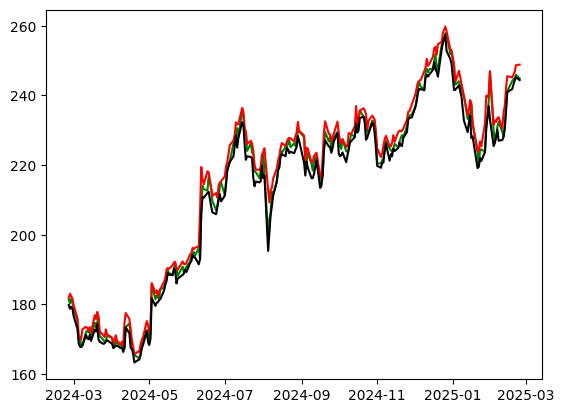

In [9]:
plt.plot(hist_data.index,hist_data['Open'],c='green')
plt.plot(hist_data.index,hist_data['High'],c='red')
plt.plot(hist_data.index,hist_data['Low'],c='black')
# plt.plot(hist_data.index,hist_data['Volume'],c='black')

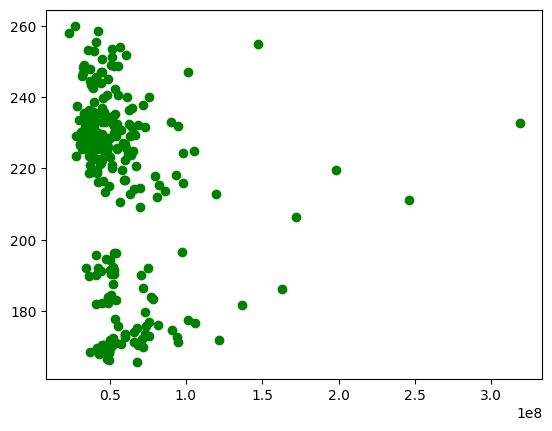

In [10]:
plt.scatter(hist_data['Volume'],hist_data['High'],c='green')

In [11]:
hist_data['Return'] = hist_data['Close'].pct_change()

hist_data['lag_1'] = hist_data['Return'].shift(1)
hist_data['lag_2'] = hist_data['Return'].shift(2)
hist_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,lag_1,lag_2
Date,,,,,,,,,,
2024-02-26 00:00:00-05:00,181.383535,181.901080,179.800996,180.308609,40867400,0.0,0.0,NaN,NaN,NaN
2024-02-27 00:00:00-05:00,180.248905,183.055644,178.716134,181.771713,54318900,0.0,0.0,0.008114,NaN,NaN
2024-02-28 00:00:00-05:00,181.652272,182.259406,179.283467,180.567398,48953900,0.0,0.0,-0.006625,0.008114,NaN
2024-02-29 00:00:00-05:00,180.418104,181.711997,178.686276,179.900543,136682600,0.0,0.0,-0.003693,-0.006625,0.008114
2024-03-01 00:00:00-05:00,178.706190,179.681580,176.546390,178.815674,73488000,0.0,0.0,-0.006030,-0.003693,-0.006625


In [12]:
# Simple Moving Average (SMA)
hist_data['SMA_10'] = hist_data['Close'].rolling(window=10).mean()  # 10-day SMA
hist_data['SMA_50'] = hist_data['Close'].rolling(window=50).mean()  # 50-day SMA

# Exponential Moving Average (EMA) - gives more weight to recent data
hist_data['EMA_10'] = hist_data['Close'].ewm(span=10, adjust=False).mean()

# Preview data
print(hist_data[['Close', 'SMA_10', 'SMA_50', 'EMA_10']].tail())


                                Close      SMA_10      SMA_50      EMA_10
Date                                                                     
2025-02-18 00:00:00-05:00  244.470001  235.284288  240.310179  237.442052
2025-02-19 00:00:00-05:00  244.869995  236.516855  240.352717  238.792587
2025-02-20 00:00:00-05:00  245.830002  237.878386  240.413856  240.072117
2025-02-21 00:00:00-05:00  245.550003  239.137000  240.473390  241.068096
2025-02-24 00:00:00-05:00  247.100006  241.109000  240.485810  242.164807


In [13]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
hist_data['RSI_14'] = compute_rsi(hist_data, window=14)

# Preview data
print(hist_data[['Close', 'RSI_14']].tail())


                                Close     RSI_14
Date                                            
2025-02-18 00:00:00-05:00  244.470001  57.847549
2025-02-19 00:00:00-05:00  244.869995  57.120857
2025-02-20 00:00:00-05:00  245.830002  60.699232
2025-02-21 00:00:00-05:00  245.550003  62.766179
2025-02-24 00:00:00-05:00  247.100006  80.231290


In [14]:
x = hist_data[['lag_1','lag_2','SMA_10', 'SMA_50', 'EMA_10','RSI_14']]
x.head()

,lag_1,lag_2,SMA_10,SMA_50,EMA_10,RSI_14
Date,,,,,,
2024-02-26 00:00:00-05:00,NaN,NaN,NaN,NaN,180.308609,NaN
2024-02-27 00:00:00-05:00,NaN,NaN,NaN,NaN,180.574628,NaN
2024-02-28 00:00:00-05:00,0.008114,NaN,NaN,NaN,180.573313,NaN
2024-02-29 00:00:00-05:00,-0.006625,0.008114,NaN,NaN,180.450992,NaN
2024-03-01 00:00:00-05:00,-0.003693,-0.006625,NaN,NaN,180.153661,NaN


In [15]:
x['lag_1'] = x['lag_1'].fillna(x['lag_1'].mean())
x['lag_2'] = x['lag_2'].fillna(x['lag_2'].mean())
x['SMA_10'] = x['SMA_10'].fillna(x['SMA_10'].mean())
x['SMA_50'] = x['SMA_50'].fillna(x['SMA_50'].mean())
x['EMA_10'] = x['EMA_10'].fillna(x['EMA_10'].mean())
x['RSI_14'] = x['RSI_14'].fillna(x['RSI_14'].mean())
x.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18796\3478893686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['lag_1'] = x['lag_1'].fillna(x['lag_1'].mean())
C:\Users\user\AppData\Local\Temp\ipykernel_18796\3478893686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['lag_2'] = x['lag_2'].fillna(x['lag_2'].mean())
C:\Users\user\AppData\Local\Temp\ipykernel_18796\3478893686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,lag_1,lag_2,SMA_10,SMA_50,EMA_10,RSI_14
Date,,,,,,
2024-02-26 00:00:00-05:00,0.001359,0.001369,213.78875,215.81354,180.308609,56.561457
2024-02-27 00:00:00-05:00,0.001359,0.001369,213.78875,215.81354,180.574628,56.561457
2024-02-28 00:00:00-05:00,0.008114,0.001369,213.78875,215.81354,180.573313,56.561457
2024-02-29 00:00:00-05:00,-0.006625,0.008114,213.78875,215.81354,180.450992,56.561457
2024-03-01 00:00:00-05:00,-0.003693,-0.006625,213.78875,215.81354,180.153661,56.561457


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,hist_data['High'],test_size=0.2)


In [17]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9921949349209432